> ## **Daegu Apartment**

[Data Source](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx) 

By Tasya Wijaya

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

**Context**

Daegu, officially known as the Metropolitan City of Daegu, is the third largest metropolitan in South Korea after Seoul and Busan with a population of around 2.5 million people. Daegu is surrounded by the Palgong-san Mountains to the north, the Biseul-san Mountains to the south, the Gaya-san hillfoots to the west, and a range of small hills to the east. Despite its beautiful scenery and seemingly cool atmosphere, Daegu remains like any other metropolitan city. With a dense population and limited land, Daegu, like other metropolitan cities, relies on apartments as a housing option for its residents. In South Korea, especially in larger cities, most people prefer to buy or sell apartments through real estate agents. This has led to a large number of real estate agents offering their services to help buy or sell apartments. 

When it comes to apartment unit sales, offers are typically made by individuals or companies. The price of an apartment unit is determined by bidders through a platform. This process can make it challenging for apartment owners to adjust their prices to match the market value. If the unit's price is too high in comparison to market prices, making a sale becomes difficult. On the other hand, if the price is too low, the owner may not be able to maximize their profit.

In the context of apartment sales, the prices are determined by bidders on a platform. This method makes it difficult for apartment owners to conform to market prices. Therefore, real estate agents help property owners determine the estimated selling price of an apartment based on property information such as the condition of the building and location, considering the market price of apartment housing in the city of Daegu as a reference. If the price is too high compared to other similar properties in the area, few people will buy the property. On the other hand, if it is too low, the property owner will not receive a proportional profit. This information must be understood by the property owner as it relates to the profit that can be obtained and by the property buyer so as not to incur a loss by getting the appropriate price.



**Problem Statement**

Therefore, real estate agents face a significant challenge in having a business model that provides financial benefits for property owners while also offering fair prices to potential buyers. `A proper model is needed to solve the problem of determining the selling price of apartments, to generate profits for property owners and real estate agents.` Moreover, to ensure that apartment prices in the area are perceived as fair and do not have a large difference between one apartment and another.


**Goals**

The goal based on the existing issues is that real estate agents need to have a tool that can be used to predict and assist property owners in determining the right selling price of the apartment. The differences in various features of a property, such as the year of construction, location, and type of hallway, can increase the accuracy of the selling price prediction, which can bring profit to the property owner.

**Analytic Approach**

So, what needs to be done is to analyze the data to find patterns from the existing features that differentiate one apartment from another. Then, it is necessary to build a regression model that will help the real estate agent to provide a prediction tool for the sales price of new apartments on their list, which will be useful for the property owner in determining the sales price of their apartment.

**Metric Evaluation**

The evaluation metrics to be used are RMSE, MAE, and MAPE. RMSE is the average root mean square of the errors, MAE is the average absolute value of the errors, while MAPE is the average percentage error generated by the regression model. The smaller the value of RMSE, MAE, and MAPE, the more accurate the model is in predicting the rental price based on the limited features used.

Additionally, also can use the R-squared or adj. R-squared value if the model selected as the final model is a linear model. The R-squared value is used to determine how well the model can represent the overall variance of the data, where its range is between 0 and 1. The larger the R-squared value (approaching 1), the more variation in the target (price) can be explained by the model. The closer to 1, the better the model fits the observational data. However, this metric is not valid for non-linear models.

### **Data Understanding**

- The dataset is a list of apartments in the city of Daegu, South Korea
- Each row of data represents information about the property and its price.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Apartment type |
| TimeToSubway | Object | Time needed to the nearest subway station |
| SubwayStation | Object | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | Float | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | The number of public office facilities nearby |
| N_SchoolNearBy(University) | Float | The number of universities nearby |
| N_Parkinglot(Basement) | Float | The number of the parking lot |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqft) | Integer | The apartment size (in square feet) |
| SalePrice | Integer | The apartment price (Won) |

<br>

In [1]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Tasya\OneDrive - OneDrive\Desktop\JCDS\Capstone\data_daegu_apartment.csv')
display(df.head())
display(df.tail())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


In [3]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [5]:
list_item = []

for item in df:
    list_item.append([item, df[item].unique(), df[item].nunique()])

unique_table = pd.DataFrame(columns=['Column', 'Unique', 'Nunique'], data=list_item)

display(unique_table)

,Column,Unique,Nunique
0,HallwayType,"[terraced, mixed, corridor]",3
1,TimeToSubway,"[0-5min, 10min~15min, 15min~20min, 5min~10min,...",5
2,SubwayStation,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang...",8
3,N_FacilitiesNearBy(ETC),"[0.0, 1.0, 5.0, 2.0]",4
4,N_FacilitiesNearBy(PublicOffice),"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]",8
5,N_SchoolNearBy(University),"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]",6
6,N_Parkinglot(Basement),"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0...",20
7,YearBuilt,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199...",16
8,N_FacilitiesInApt,"[10, 4, 5, 7, 2, 9, 8, 1, 3]",9
9,Size(sqf),"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11...",89


In [6]:
df[df['N_FacilitiesNearBy(PublicOffice)']==0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
26,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
114,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,460176
316,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,338053
337,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,362831
390,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1256,469026
436,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,362831
443,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,361946
545,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,357522
566,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,451327


Some things that can be seen from the `Daegu Apartment` dataset:

- The Daegu Apartment dataset has 11 columns and 4123 rows of data
- The dataset doesn't have any missing values
- The dataset consists of 3 categorical columns and 8 numerical columns that are divided into float and integer
- Some columns have data with value of 0, this zero can be interpreted as the unavailability of the facilities mentioned in each column (Public Office, Parking Lot, University, etc.)
- Further investigation shows that the data in the N_FacilitiesNearBy(PublicOffice) column with value 0 (46 rows of data) seems to come from the same apartment building, so the only factor affecting the selling price of the apartment will be only from the Size(sqf) column.

#### **Exploratory Data Analysis (EDA)**

**Sale Price Distribution of Daegu Apartment**

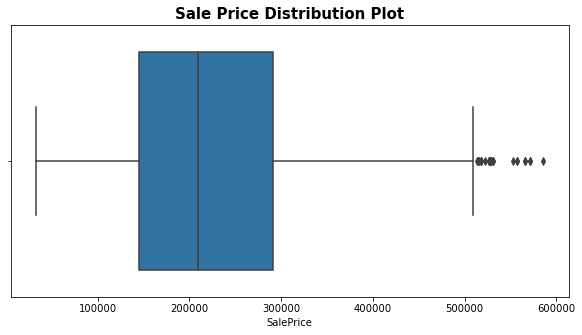

In [7]:
# Distribution Plot From 'SalePrice' Column
plt.figure(figsize=(10, 5))
sns.boxplot(df['SalePrice'])
plt.title('Sale Price Distribution Plot', size=15, weight='bold')
plt.show()

Based on the apartment price distribution plot above, it can be seen that there is a 'right-skewed distribution'. In other words, there is positive skewness in the SalePrice feature

**Total Apatment Related To Subway Station Nearby**

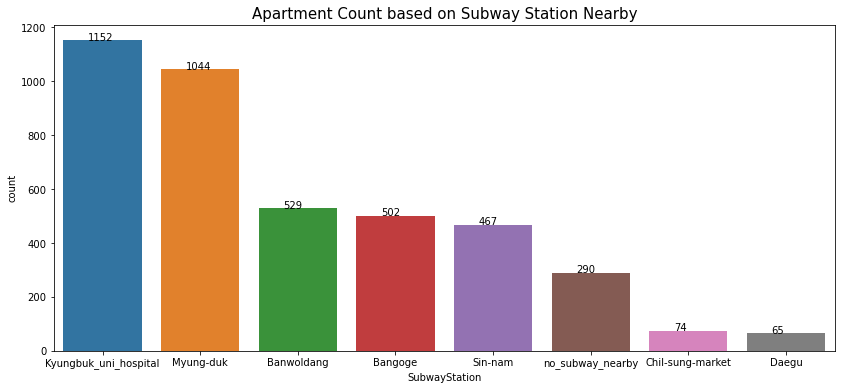

In [8]:
# Check the number of apartments based on the subway station nearby and hallway type

plt.figure(figsize = (14, 6))
fig = sns.countplot(x = 'SubwayStation', data = df,
                    order = df['SubwayStation'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Apartment Count based on Subway Station Nearby', fontsize = 15)

plt.show()

Text(0.5, 1.0, 'Apartment Count based on Hallway Type')

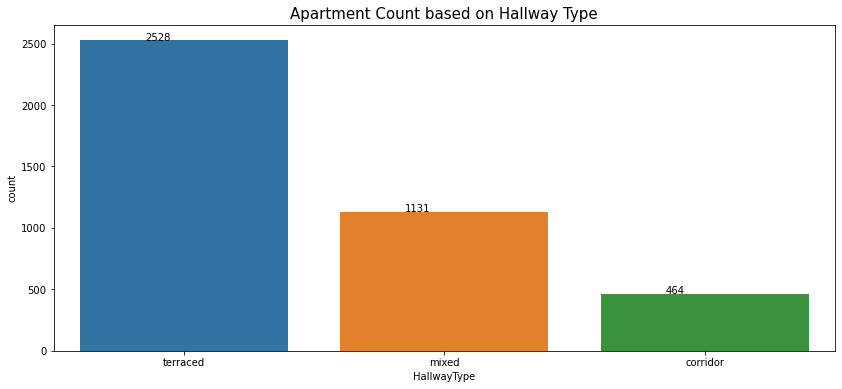

In [9]:
# Check the number of apartments based on the hallway type

plt.figure(figsize = (14, 6))
fig = sns.countplot(x = 'HallwayType', data = df,
                    order = df['HallwayType'].value_counts().index)

for p in fig.patches:
   fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Apartment Count based on Hallway Type', fontsize = 15)


A majority of apartments are situated near `Kyungbuk_uni_hospital` and `Myung-duk` subway stations and the most common types of hallways being sold are `terrace` and `mixed`.

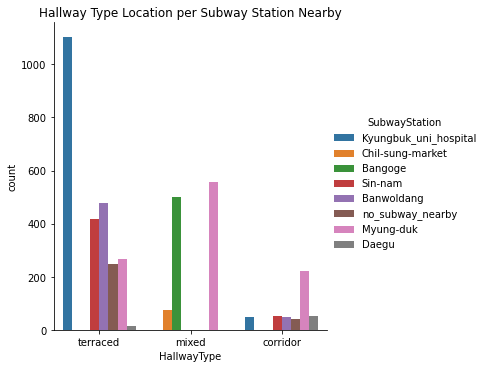

In [10]:
# Total Apartment based on HallwayType and SubwayStation

sns.catplot(data=df, x='HallwayType', kind='count', hue='SubwayStation')
plt.title('Hallway Type Location per Subway Station Nearby')
plt.show()

Most apartments close to the Kyungbuk_uni_hospital subway station have terraced hallways, while a majority of those near the Myung-duk subway station have mixed hallways, although some other types of hallways can also be found, albeit in smaller numbers.

**Apatment Related To Sale Price**

In [11]:
# The price of a house per square feet

df_copy = df
df_copy['SalePriceSqf'] = df_copy['SalePrice'] / df_copy['Size(sqf)']

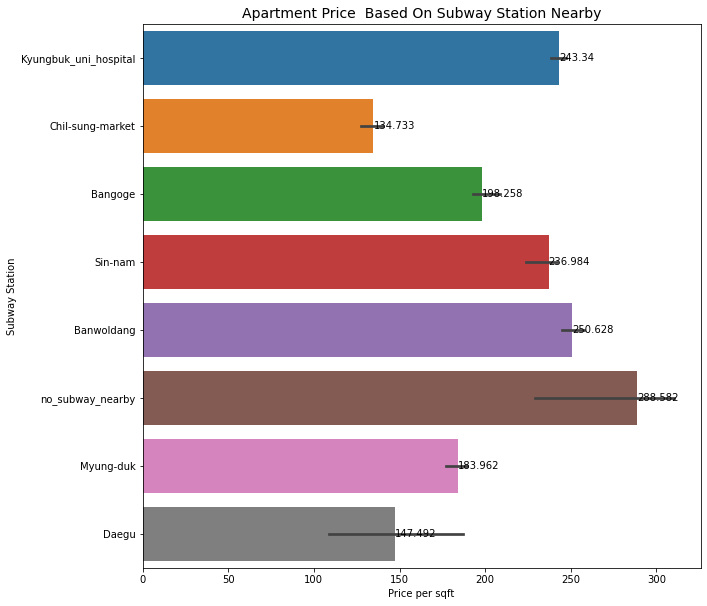

In [12]:
# The price of apartments based on the nearest station.

plt.figure(figsize=(10,10))
fig = sns.barplot(x = 'SalePriceSqf', y = 'SubwayStation', data = df_copy, estimator=np.median)
for i in fig.containers:
    fig.bar_label(i,)
plt.xlabel('Price per sqft')
plt.ylabel('Subway Station')
plt.title('Apartment Price  Based On Subway Station Nearby', fontsize=14)
plt.show()

As seen from the barplot above, the median of the highest price per square foot is in apartments that do not have a subway station nearby, while the second highest median price is in apartments located near Banwoldang station.

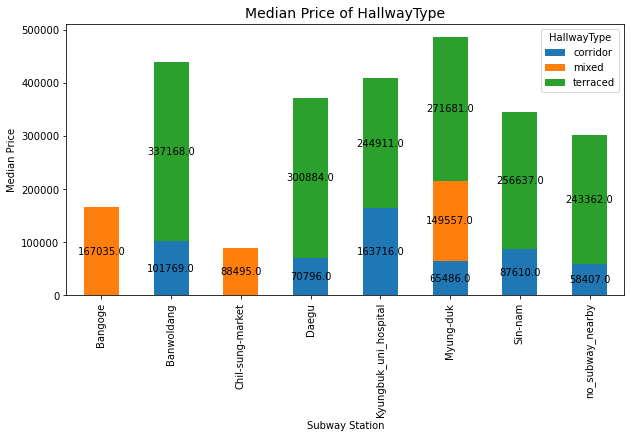

In [13]:
# Median SalePrice for each HallwayType apartment at each nearest SubwayStation

table = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

median_price = table.plot(kind='bar', stacked=True, figsize=(10,5))
for i in median_price.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in i]
    median_price.bar_label(i, labels=labels, label_type='center')
plt.xlabel('Subway Station')

plt.ylabel('Median Price')
plt.title('Median Price of HallwayType', fontsize=14)
plt.show()

The chart shows that apartments with corridor type hallways have a low median price, while those with terraced hallways have a high median price. This suggests high demand for apartments with terraced hallways almost in all area.


### **Data Preprocessing**

In this stage, we will perform cleaning on the data, which will later be used for further analysis. Some things that need to be done are:

- Drop features that have no relevance to the current problem.
- Perform treatment on missing values if any. This can be done by dropping the feature if it is not needed or by imputing it with the most reasonable value based on the case.

For the preprocessing and feature engineering process, we will use a duplicated dataframe from the previously used dataframe.

In [14]:
# Duplicate dataframe
df_model = df.copy()

In [15]:
# Check for more detailed information for each feature.
list_item = []

for i in df_model.columns:
    list_item.append([i, df[i].dtype, df[i].isna().sum(), round((df[i].isna().sum() / len(df)) * 100, 2), df[i].nunique(), df[i].drop_duplicates().sample(2).values])

new_table = pd.DataFrame(data = list_item, columns = ['Feature', 'DataType', 'Null', 'NullPercentage', 'Unique', 'Unique Sample' ])

new_table

,Feature,DataType,Null,NullPercentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[no_bus_stop_nearby, 10min~15min]"
2,SubwayStation,object,0,0.0,8,"[Banwoldang, no_subway_nearby]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 5.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[6.0, 2.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[0.0, 3.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[108.0, 475.0]"
7,YearBuilt,int64,0,0.0,16,"[2006, 2013]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[5, 9]"
9,Size(sqf),int64,0,0.0,89,"[1643, 1256]"


The features `N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, `N_SchoolNearBy(University)`, and `N_Parkinglot(Basement)` have data type float, but they should be of data type integer.

In [16]:
# Change the data type from float to integer.
df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype('int64')
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype('int64')
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype('int64')

**Missing Value**

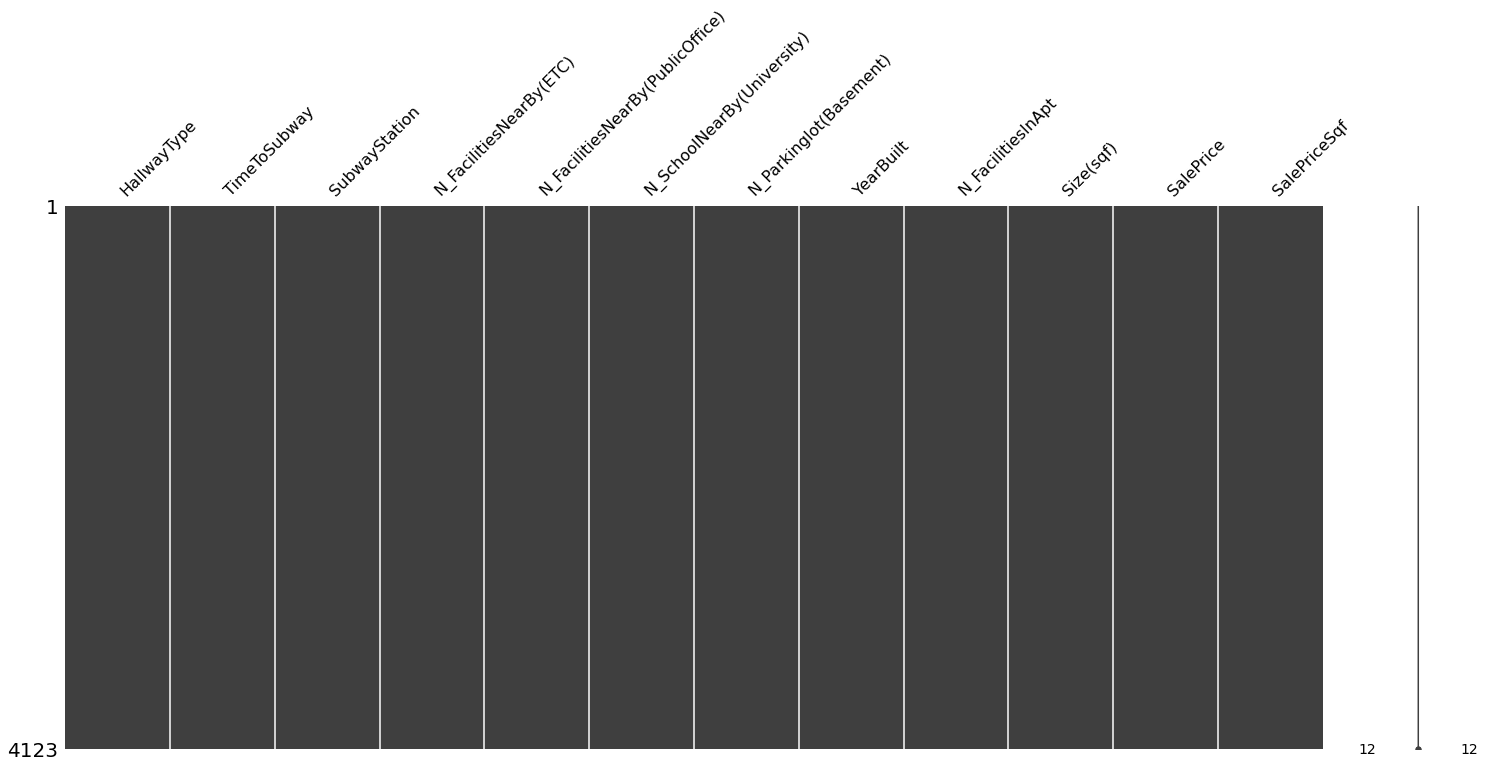

In [17]:
import missingno

missingno.matrix(df_model);

In [18]:
df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
SalePriceSqf                        0
dtype: int64

Based on the matrix above, it is shown that there are no missing values in the `Daegu Apartment` dataset.

**Duplicate Data**

In [19]:
# Conduct a check for duplicated data

print(f'The number of duplicate data in the "Daegu Apartments" dataset is: {df_model.duplicated().sum()} rows\n')
display(df_model[df_model.duplicated()])


The number of duplicate data in the "Daegu Apartments" dataset is: 1422 rows



,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,SalePriceSqf
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345,289.390110
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681,406.653173
122,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274,231.791925
127,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637,184.101148
133,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,644,168141,261.088509
...,...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0,3,2,400,2015,7,644,300884,467.211180
4114,corridor,10min~15min,Myung-duk,5,7,5,0,1992,3,355,86725,244.295775
4115,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141,95.480409
4120,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141,95.480409


The `Daegu Apartments` dataset has 1422 duplicate data rows, so the duplicated values are dropped while keeping the first record value.

In [20]:
# Check the number of duplicate data after drop duplicate
df_model.drop_duplicates(keep='first', inplace=True)
print(f'The number of duplicate data in the "Daegu Apartments" dataset is: {df_model.duplicated().sum()} rows\n')

The number of duplicate data in the "Daegu Apartments" dataset is: 0 rows



**Data Correlation**

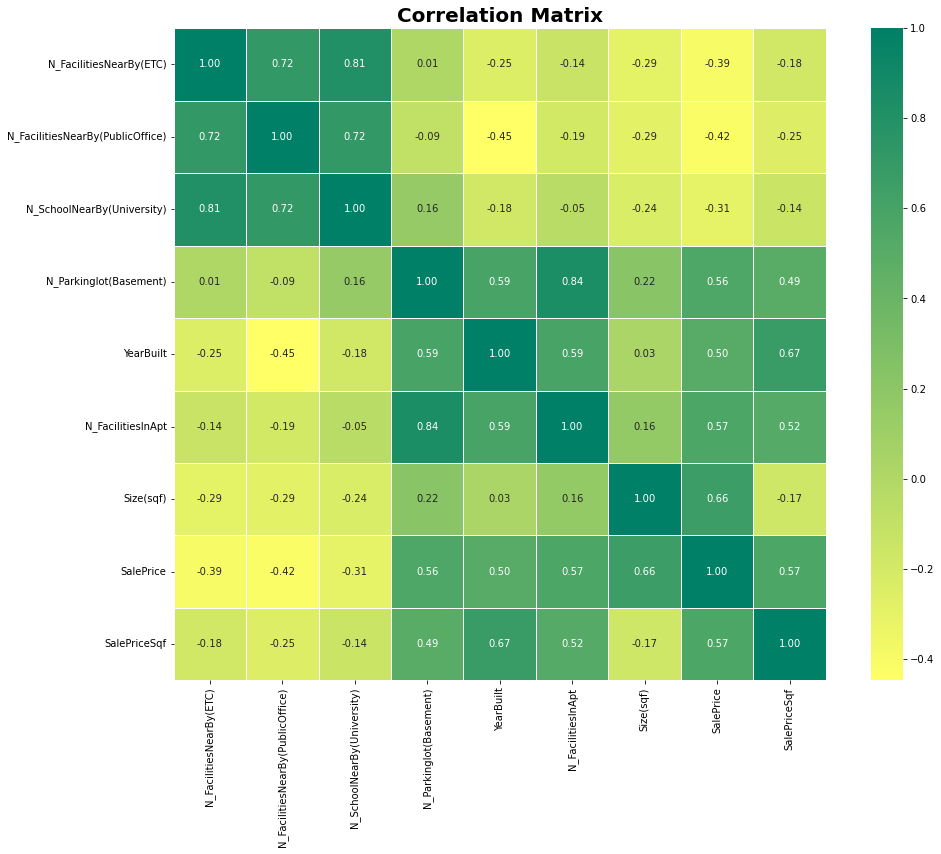

In [21]:
# Correlation Matrix

plt.figure(figsize=(16, 12))
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='summer_r', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=20, weight='bold');

A strong correlation between independent variables (example: `N_FacilitiesNearBy(ETC) and N_SchoolNearBy(University)`) suggests the existence of multicollinearity. When two independent variables have a correlation value above 0.7, this suggests a significant multicollinearity issue. This affects the regression analysis that utilizes the least squares method for estimating regression parameters. When there is multicollinearity, the slope interpretation in multiple linear regression is no longer valid because the dependent variable is not the only one that changes in value.

The feature with the highest correlation to the target SalePrice is Size(sqf), with a positive correlation value of 0.66. This means that the larger the apartment unit, the higher its sales price. However, the relationship between Size(sqf) and SalePrice is referred to as "moderate correlation" because the correlation value is less than 0.7 and it doesn't have a strong correlation with other numeric independent variables. 

Meanwhile, the feature N_FacilitiesNearBy(PublicOffice) has a value of -0.42 against SalePrice. This means that SalePrice will increase as the number of N_FacilitiesNearBy(PublicOffice) decreases.

**Outliers Detection**

The presence of outliers in the data will certainly impact the results of the analysis and modeling performed. There are several things to consider before deciding on the appropriate treatment for the data, including considering domain knowledge.

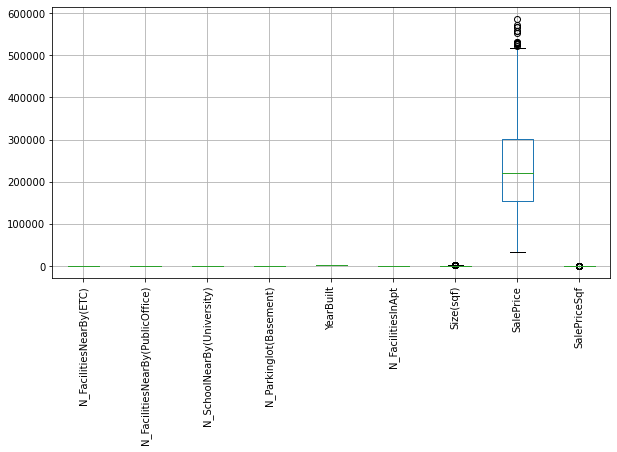

In [22]:
# Plotting a boxplot to check for outliers

plt.figure(figsize=(10,5))
df_model.boxplot(rot=90);

The boxplot reveals that `SalePrice` and `Size(sqf)` are the features with outliers. To remove outliers from the dataset, data engineering will be carried out on these features by considering the combination of results from the IQR method. The resulting model will only be capable of predicting new listings with values within the data range based on this clean dataset. Any prediction results from the model outside of the data range will be biased.

In [23]:
# Function for checking outliers

def outlier_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

`Size(sqf)`

In [24]:
# Check outliers for feature "Size (sqf)"

outlier_anomalies(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [25]:
# Check descriptive statistics for feature "Size (sqf)"

df_model['Size(sqf)'].describe()

count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [26]:
# Check the number of values for "Size (sqf)" > 1803.0

df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)']

84

Based on the descriptive statistics table above, the third quartile value (75% of data) in the `Size (sqf)` column is 1167, while the maximum value is 2337 (twice as much). It can be concluded that the data distribution for the "Size (sqf)" feature is skewed to the right (positive skewness).

Therefore, data with values above the upper limit of the IQR method will be dropped and not included in the modeling, thus reducing its skewness. This will certainly be a limitation for the model to be built later.

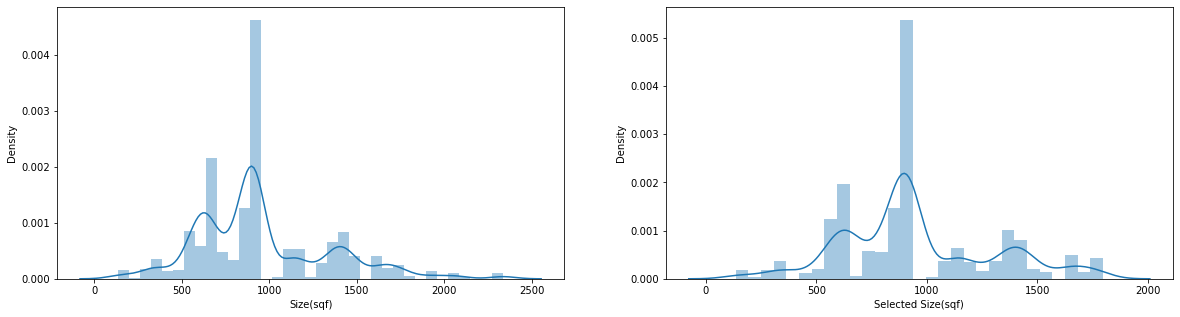

In [27]:
# Filtering data from outliers

df_model = df_model[(df_model['Size(sqf)'] <= 1803.0)]

# Distribution size plot before and after filtering

fig, axes = plt.subplots(1,2, figsize=(20, 5))
sns.distplot(df['Size(sqf)'], ax=axes[0])
sns.distplot(df_model['Size(sqf)'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Selected Size(sqf)');

`SalePrice`

In [28]:
# Check outliers for feature "SalePrice"

outlier_anomalies(df_model['SalePrice'])

IQR: 144248.0
limit_bawah: -65930.0
limit_atas: 511062.0


In [29]:
# Check descriptive statistics for feature "SalePrice"

df_model['SalePrice'].describe()

count      2617.000000
mean     225281.601834
std      102129.386220
min       32743.000000
25%      150442.000000
50%      217699.000000
75%      294690.000000
max      566371.000000
Name: SalePrice, dtype: float64

In [30]:
# Check the number of values for "SalePrice" > 511062.0

df_model[df_model['SalePrice'] > 511062.0].count()['SalePrice']

10

Based on the descriptive statistics table above, the third quartile value (75% of data) in the `SalePrice` column is  294690, while the maximum value is 566371 (twice as much). It can be concluded that the data distribution for the `SalePrice` feature is skewed to the right (positive skewness).

Therefore, data with values above the upper limit of the IQR method will be dropped and not included in the modeling, thus reducing its skewness. This will certainly be a limitation for the model to be built later.

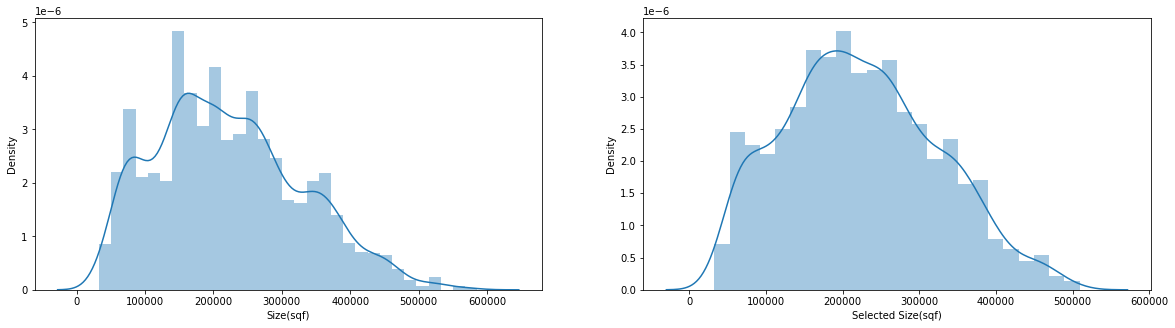

In [31]:
# Filtering data from outliers

df_model = df_model[(df_model['SalePrice'] <= 511062.0)]

# Distribution size plot before and after filtering

fig, axes = plt.subplots(1,2, figsize=(20, 5))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Selected Size(sqf)');

**Clean Dataset**

In [32]:
df_model.drop(columns='SalePriceSqf', inplace=True)

In [33]:
# Check the cleaned dataset

df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [34]:
# Check the dataset information again

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2607 non-null   object
 1   TimeToSubway                      2607 non-null   object
 2   SubwayStation                     2607 non-null   object
 3   N_FacilitiesNearBy(ETC)           2607 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2607 non-null   int64 
 5   N_SchoolNearBy(University)        2607 non-null   int64 
 6   N_Parkinglot(Basement)            2607 non-null   int64 
 7   YearBuilt                         2607 non-null   int64 
 8   N_FacilitiesInApt                 2607 non-null   int64 
 9   Size(sqf)                         2607 non-null   int64 
 10  SalePrice                         2607 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 244.4+ KB


After filtering outliers, it was found that 2607 records of data will be used for modeling or 36.7% records of data have been eliminated.

### **Modelling**

In [35]:
# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Algoritma Modelling Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Encoding in machine learning refers to the process of converting categorical or textual data into a numerical representation that can be used as input to a model. The dataset contains a feature that has an Object data type, to be usable in machine learning, it needs to be transformed through encoding. The following features will be encoded:

- `HallwayType` : One-Hot Encoding will be performed on this feature because it consists of 3 categories
- `TimeToSubway` : Binary Encoding will be performed on this feature because it consists of 8 categories
- `SubwayStation` : Ordinal Encoding will be performed on this feature because the data will be sorted from the lowest (far from the subway) to the highest (close to the subway)


In [36]:
# Check the number of unique values in the TimeToSubway feature

df_model['TimeToSubway'].value_counts()

0-5min                1186
5min~10min             501
10min~15min            426
15min~20min            394
no_bus_stop_nearby     100
Name: TimeToSubway, dtype: int64

In [37]:
# Converting categorical features into numerical

ordinal_mapping = [
    {'col':'TimeToSubway', 
    'mapping':{'no_bus_stop_nearby':0, '15min~20min':1, '10min~15min':2, '5min~10min':3, '0-5min':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
                                ('one_hot_encoder', OneHotEncoder(drop='first'), ['HallwayType']),
                                ('binary_encoder', ce.BinaryEncoder(), ['SubwayStation']),
                                ('ordinal_encoder', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

**Data Splitting**

- X = Features
- Y = Target

In [38]:
# Splitting data menjadi data independent dan data dependent/target

x = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

Splitting the training and test data with a proportion of 80:20 means dividing the data into two parts, 80% for training data and 20% for test data. The training data is used to train the model, while the test data is used to evaluate the performance of the trained model. The proportion of 80:20 is also a commonly used standard in the machine learning process.

In [39]:
# Splitting the training and test data with a proportion of 80:20

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size=0.2, 
    random_state=5)

**Choose a Benchmark Model**

Modeling will be performed in a `logarithmic scale` because modeling in logarithmic scale can help address issues of imbalanced data distribution and remove the effects of large scale. Inverting back to the original scale allows for easier interpretation and translation into a business or practical application context.

The feature scaling to be used in this modeling is `standard scaling`. Standard scaling is a method of feature scaling in machine learning that involves transforming the features of a dataset to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of each feature from each data point and dividing the result by the standard deviation of the feature. The result is a new dataset with a mean of 0 and standard deviation of 1, which can help the machine learning algorithm converge faster and produce better results. This method is useful when the features have different units of measurement or when the features have different ranges, as it helps to bring the features to a common scale and improve the performance of the algorithm.

In [40]:
# Define the algorithm that will be used
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=5)
rf = RandomForestRegressor(random_state=5)
xgb = XGBRegressor(random_state=5)

# Modeling is performed in logarithmic scale, but then inverted back for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Data Scaling
scaler = StandardScaler()

# Algorithm candidate
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Finding the best algorithm based on each metric
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise')
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[0.7358656  0.70137628 0.745293   0.70704943 0.66978095] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-52462.31393774 -56502.69653981 -52619.44981412 -55136.42000942
 -55836.69562858] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42997.43637841 -45396.33454756 -42522.41338529 -44277.98326344
 -44866.16357753] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.21828216 -0.22369172 -0.22377395 -0.21628554 -0.22003613] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.76728104 0.75761836 0.78657041 0.79111348 0.77372929] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegresso

In [41]:
# Evaluation of the results from 5 algorithms
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_R2,Std_R2,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,0.711873,0.026824,-54511.515186,1666.766304,-44012.066230,1092.239191,-0.220414,0.002959
1,KNN Regressor,0.775263,0.012300,-48218.849725,1733.086866,-38155.919470,1283.931555,-0.198411,0.009930
2,DecisionTree Regressor,0.798639,0.006102,-45663.146153,1536.641395,-36424.505720,1362.730974,-0.185432,0.007734
3,RandomForest Regressor,0.798435,0.006474,-45686.077492,1573.583577,-36441.008481,1413.654936,-0.185864,0.008107
4,XGBoost Regressor,0.798730,0.006157,-45652.814912,1543.163157,-36412.328754,1369.572440,-0.185364,0.007736


According to the table, **Decision Tree Regressor**, **Random Forest Regressor**, and **XGBoost Regressor** have the highest mean R2, mean RMSE, mean MAE, and mean MAPE values. These models also have relatively small standard deviations, indicating that their results are relatively consistent.

Therefore, among the five models compared, **Decision Tree Regressor**, **Random Forest Regressor**, and **XGBoost Regressor** could be considered the best models.

**Predict to Test Set with the Benchmark Model**

Prediction on the test set using Decision Tree, Random Forest, and XGBoost Regressor models.

In [42]:
# Benchmark the top 3 models

models = {
    'DecisionTree Regression': DecisionTreeRegressor(random_state=5),
    'RandomForest': RandomForestRegressor(random_state=5),
    'XGB': XGBRegressor(random_state=5)
    
}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

# Testing Prediction
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R2': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

print('Testing Results Before Tuning')
display(score_before_tuning)

Testing Results Before Tuning


,R2,RMSE,MAE,MAPE
DecisionTree Regression,0.791687,43523.650292,34970.528555,0.184766
RandomForest,0.794385,43240.851321,34901.838197,0.183868
XGB,0.795642,43108.490243,34861.898572,0.183051


Based on table above, the **XGBoost** model performed the best in terms of all three metrics, having the lowest RMSE, MAE, and MAPE.

**Hyperparameter Tuning**

Based on the results of the three tested metrics, XGBoost showed the best performance. Therefore, the XGBoost model will be used as the final model. In this stage, hyperparameter tuning will be performed on the XGBoost model in hopes of improving its performance.

In [43]:
# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number or tree
n_estimators = list(np.arange(100, 201))

# Percentage of rows per tree (of the total number of rows in the training set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Number of features used for each tree (as a percentage of the total number of columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

The code defines hyperparameters for an XGBoost model and creates a hyperparameter search space for them. The variables are as follows:

- `max_depth`: the maximum depth of each tree in the XGBoost model. The values range from 1 to 10.

- `learning_rate`: the learning rate used by the XGBoost model. The values range from 0.01 to 1.

- `n_estimators`: the number of trees in the XGBoost model. The values range from 100 to 200.

- `subsample`: the percentage of the training data used for each tree in the XGBoost model. The values range from 20% to 90%.

- `gamma`: the minimum reduction in impurity required to split a leaf node in the XGBoost model. The values range from 1 to 10. The higher the value, the more conservative (simpler) the model will be.

- `colsample_bytre`e: the number of features used for each tree in the XGBoost model as a percentage of the total number of columns in the training set. The values range from 10% to 90%.

- `reg_alpha`: the regularization alpha used in the XGBoost model. The values range from 0.001 to 10. The higher the value, the more conservative (simpler) the model will be.

Finally, the hyperparam_space_xgb variable is a dictionary that defines the hyperparameters and their corresponding value ranges for the XGBoost model.

In [44]:
# Benchmark the model with hyperparameter tuning
xgb = XGBRegressor(random_state=5, verbosity=0)

# Define algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Only able to choose one metric for optimization
    random_state = 1  
)

In [45]:
# Fitting the training data to find the best parameters
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ordinal_encoder',
                                                                               Ordin

In [46]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan R-Squared
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
23,0.225131,0.061158,0.016213,0.001533,0.9,3.593814,153,4,0.33,9,...,1213.553965,4,-0.200840,-0.198545,-0.198602,-0.189881,-0.180893,-0.193752,0.007444,9
7,0.327934,0.042625,0.017533,0.001944,0.9,0.059948,119,8,0.05,5,...,1262.080368,1,-0.199754,-0.197014,-0.196792,-0.188511,-0.178616,-0.192137,0.007739,1
17,0.536122,0.232313,0.017469,0.001209,0.6,0.001,190,5,0.04,9,...,1270.603138,2,-0.200104,-0.199148,-0.197234,-0.189472,-0.178965,-0.192984,0.007945,2
18,0.161265,0.004993,0.014309,0.002828,0.9,0.007743,177,2,0.83,10,...,1101.266726,7,-0.200276,-0.198291,-0.197771,-0.191465,-0.181577,-0.193876,0.006822,11
43,0.411037,0.200656,0.018211,0.002656,0.5,0.16681,172,5,0.31,7,...,1204.373754,5,-0.202781,-0.197794,-0.196155,-0.189840,-0.180861,-0.193486,0.007547,7


In [47]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45475.958498917425
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 3.593813663804626, 'model__n_estimators': 153, 'model__max_depth': 4, 'model__learning_rate': 0.33, 'model__gamma': 9, 'model__colsample_bytree': 0.3}


**Predict to Test Set with the Tuned Model**

Making predictions on the test set using the selected XGBoost model and hyperparameters

In [48]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=5)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R2': r2_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,R2,RMSE,MAE,MAPE
XGB,0.799302,42720.659825,34821.149904,0.181453


**Performance Comparison**

Comparison of XGBoost model performance before and after hyperparameter tuning

In [49]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['XGB']).T

,R2,RMSE,MAE,MAPE
XGB,0.795642,43108.490243,34861.898572,0.183051


In [50]:
# Setelah hyperparameter tuning
score_after_tuning

,R2,RMSE,MAE,MAPE
XGB,0.799302,42720.659825,34821.149904,0.181453


The XGB model's performance has improved after hyperparameter tuning. The R2 score has increased from 0.795642 to 0.799302, indicating an increase in the model's ability to explain the variability of the target variable. The RMSE and MAE have decreased, meaning that the model is making fewer errors in prediction, and the MAPE has also decreased, indicating that the model is making more accurate predictions.

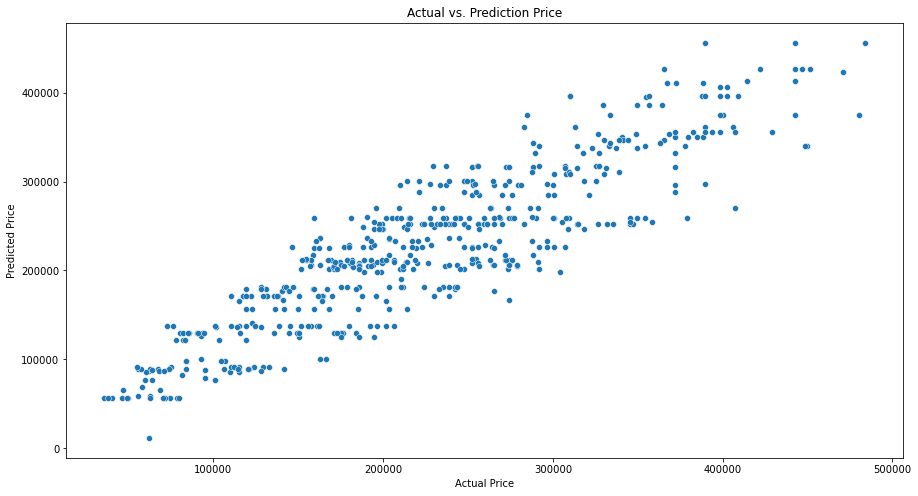

In [51]:
plt.figure(figsize=(15, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

**Feature Importances**

To find out which features actually affect the target (price), one thing that can be done is to check it through the feature_importances_ function.

In [52]:
# Feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.to_frame(name='feature importances')

,feature importances
one_hot_encoder__x0_terraced,0.510122
N_FacilitiesInApt,0.110185
Size(sqf),0.091757
ordinal_encoder__TimeToSubway,0.079240
binary_encoder__SubwayStation_0,0.054250
YearBuilt,0.051295
N_FacilitiesNearBy(ETC),0.030220
N_FacilitiesNearBy(PublicOffice),0.028910
one_hot_encoder__x0_mixed,0.021271
N_Parkinglot(Basement),0.012294


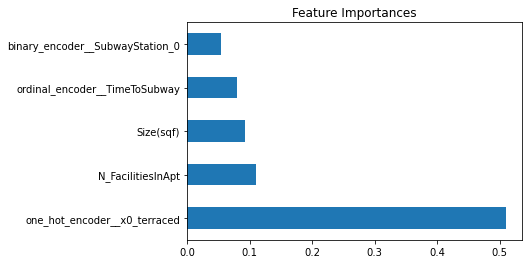

In [53]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');